In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import glob
import numpy as np
import statistics
import math
from shutil import copyfile
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro

import scipy
from collections import Counter


In [2]:
position = ["position_x","position_y","position_z"]
target= ["target_position_x","target_position_y","target_position_z"]
total_time = "time"

max_distance_error = 4.0

max_height_error = 3*max_distance_error/4
max_contraction_error = 1.0
feedback_types = ['Visual', 'Glove', 'Bracelets']
question_dict = {'Q1': 'How mentally demanding was the test ?\n', 'Q2': 'How hurried or rushed \n was the pace of the task?', 'Q3': 'How physically demanding was the test?\n', 'Q4': 'How successful were you \n in accomplishing the task ?', 'Q5': 'How insecure, discouraged, irritated, \n stressed and annoyed were you ?'}
information_types = ["height", "directional","extension",  'task in general']

In [3]:
# plot settings

lw = 1.5

fs = 13

params = {
    'axes.labelsize': fs,
    'font.size': fs,
    'legend.fontsize': fs,
    'xtick.labelsize': fs,
    'ytick.labelsize': fs,
    #'text.usetex' : True,
    'figure.figsize': [4, 4],
    'boxplot.boxprops.linewidth' : lw,
    'boxplot.whiskerprops.linewidth' : lw,
    'boxplot.capprops.linewidth' : lw,
    'boxplot.medianprops.linewidth' : lw,
    'font.family' : 'serif'
    

   }
mpl.rcParams.update(params)

In [4]:
os.chdir('..\Bidirectional_interface\Assets\Logs')

In [5]:
os.mkdir("survey_results")


FileExistsError: [WinError 183] Impossible de créer un fichier déjà existant: 'survey_results'

In [6]:
files = glob.glob("survey_results//*.csv")

In [7]:
#visual_df = pd.read_csv(folder + "NASA_visual_results.csv")
def attribute_files() :
    global visual_df, bracelets_df, glove_df,general_df
    for file in files :
        print(file)
        if "visual" in file:
            visual_df = pd.read_csv(file)
        elif "glove" in file:
            glove_df = pd.read_csv(file)
        elif "bracelets" in file:
            bracelets_df = pd.read_csv(file)
        elif "general" in file:
            general_df = pd.read_csv(file)

In [8]:
attribute_files()

survey_results\general_survey_modif.csv
survey_results\NASA_bracelets_results.csv
survey_results\NASA_glove_results.csv
survey_results\NASA_visual_results.csv


In [9]:
column_name = list(general_df.columns)
column_name.pop(0)
column_name

['Subject n',
 'Age',
 'Gender',
 'Which feedback system was easier to use for height (up/down) control?',
 'Which feedback system did you prefer to use for height (up/down) control?',
 'How useful were the bracelets for height (up/down) control??',
 'How useful was the glove for height (up/down) control??',
 'How useful was the visual feedback for height (up/down) control??',
 'Which feedback system was easier to use for planar directional (front/back/left/right) control ?',
 'Which feedback system did you prefer to use for planar directional (front/back/left/right) control ?',
 'How useful were the bracelets for horizontal directional (front/back/left/right) control ?',
 'How useful was the glove for horizontal directional (front/back/left/right) control ?',
 'How useful was the visual feedback for horizontal directional (front/back/left/right) control ?',
 'Which feedback system was easier to use for extension/contraction control ?',
 'Which feedback system did you prefer to use for

In [10]:
def plot_boxplot_NASA(Question):
    # Define styling for each boxplot component
    medianprops = {'color': 'magenta', 'linewidth': 2}
    boxprops = {'color': 'black', 'linestyle': '-', 'linewidth':2}
    whiskerprops = {'color': 'black', 'linestyle': '-'}
    capprops = {'color': 'black', 'linestyle': '-'}
    flierprops = {'color': 'black', 'marker': 'x'}
 
    fig = plt.figure()
    ax = plt.axes()

    width = 0.5
    bp = plt.boxplot([visual_df[Question], glove_df[Question], bracelets_df[Question]],
                     widths = width, labels = feedback_types,medianprops=medianprops,
                       boxprops=boxprops,
                       whiskerprops=whiskerprops,
                     patch_artist=True,  # fill with color
                       capprops=capprops,
                       flierprops=flierprops )

    colors = ['pink', 'lightblue', 'lightgreen']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        
    
    plt.title(question_dict[Question])
    ax.set_xlabel('Feedback type')
    ax.set_ylabel('Response')
    ax.set_ylim(-10,110)
        

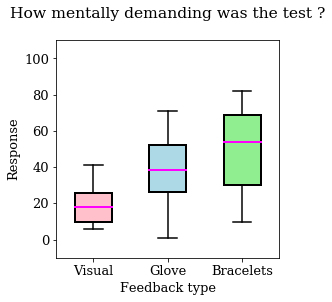

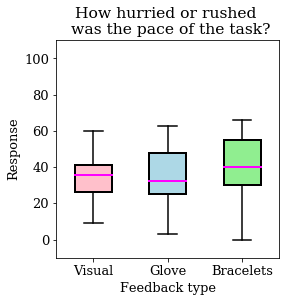

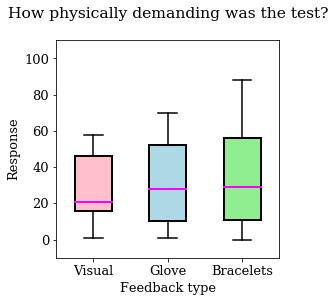

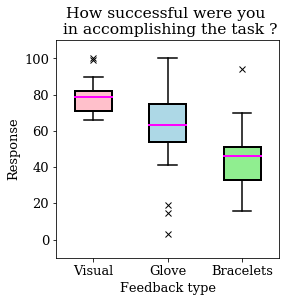

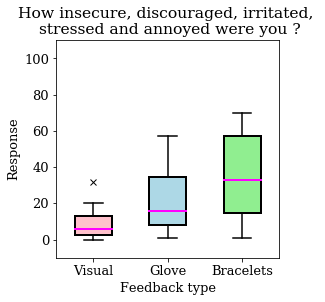

In [11]:
for question in question_dict:
    plot_boxplot_NASA(question)

In [39]:
test_all_hypo_for_questions()

 ** 
H0 hypothesis (feedback has no effect) is rejected
Visual feedback gives better results than Glove feedback Q1

 *** 
H0 hypothesis (feedback has no effect) is rejected
Visual feedback gives better results than Bracelets feedback Q1

H0 hypothesis (feedback has no effect) is accepted with Bracelets and Glove Q1

H0 hypothesis (feedback has no effect) is accepted with Visual and Glove Q3

H0 hypothesis (feedback has no effect) is accepted with Visual and Bracelets Q3

H0 hypothesis (feedback has no effect) is accepted with Bracelets and Glove Q3

 * 
H0 hypothesis (feedback has no effect) is rejected
Visual feedback gives better results than Glove feedback Q4

 *** 
H0 hypothesis (feedback has no effect) is rejected
Visual feedback gives better results than Bracelets feedback Q4

H0 hypothesis (feedback has no effect) is accepted with Bracelets and Glove Q4

 * 
H0 hypothesis (feedback has no effect) is rejected
Visual feedback gives better results than Glove feedback Q5

 *** 
H0 

In [ ]:
def check_normality():
    nb_of_transfo = 3
    for question in question_dict:
        column = 0
        fig, ax = plt.subplots(nrows=2, ncols=nb_of_transfo*3, figsize=(nb_of_transfo*4*3,10))
        for feedback_number in range(0,3):    
            if feedback_number == 0:
                distr = visual_df[question]
            elif feedback_number == 1:
                distr = glove_df[question]
            elif feedback_number == 2:
                distr = bracelets_df[question]
            for i in range(0,nb_of_transfo):
                if i==0:
                    transfo = ""
                    distribution = distr
                elif i == 1: 
                    transfo = " log"
                    distribution = np.log(np.array(distr)+0.000001)
                elif i ==2:
                    transfo = " sqrt"
                    distribution =  np.sqrt(distr)

                #         Histogram
                stat, p = shapiro(distribution)
    #             print('Statistics=%.3f, p=%.3f' % (stat, p))
                # interpret
                alpha = 0.05
                if p > alpha: 
                    result_color = 'lightgreen'
                    result_text = 'Sample = Gaussian'
                else: 
                    result_color = 'lightsalmon'
                    result_text = "Sample != Gaussian"

                ax[0][column].plot([],[], color = result_color, label = result_text)
                ax[0][column].legend()


                ax[0][column].hist(distribution,color = result_color)
                ax[0][column].set_ylabel("Nb of subjects")
                ax[0][column].set_xlabel("Time [s]")
        #         qqplot
                qqplot(np.asarray(distribution), line='s', ax = ax[1][column], color = result_color)
                ax[0][column].set_title(question + transfo)
                column += 1
                plt.tight_layout()    
            plt.suptitle(question_dict[question],y = 1.02, ha = 'left')

        
        

    

In [ ]:
check_normality()

We can see that Q1, Q3 and Q4 are following a linear distribution, therefore, we can use the Kruskal statistical test

After a sqrt transformation, all the Q5 become linear, and we can therefore use the Kruskal test on this transfo

For question 2 however, no transformation allow to have a linear distribution for all the feedback systems, we therefore use the Friedmann test for non-parametric distribution

In [38]:
normal_questions = ["Q1", "Q3", "Q4"]
sqrt_normal_questions = ["Q5"]
non_normal_questions = ["Q2"]
    
def hypothesis_test_question(fb_type1, fb_type2, question, test_type):
    if fb_type1 == "Visual":
        distr1 = visual_df[question]
    elif fb_type1 == "Glove":
        distr1 = glove_df[question]
    elif fb_type1 == "Bracelets":
        distr1 = bracelets_df[question]
    
    if fb_type2 == "Visual":
        distr2 = visual_df[question]
    elif fb_type2 == "Glove":
        distr2 = glove_df[question]
    elif fb_type2 == "Bracelets":
        distr2 = bracelets_df[question]
    
    if test_type == "sqrt_normal":
        distr1 = np.sqrt(distr1)
        distr2 = np.sqrt(distr2)
    
    if test_type == "normal" or test_type == "sqrt_normal":
        _, pvalue = scipy.stats.f_oneway(distr1, distr2) 
    elif test_type == "non_normal":
        _, pvalue = scipy.stats.kruskal(distr1, distr2) 
    if pvalue < 0.001:
        print(" *** ")
    elif pvalue < 0.01:
        print(" ** ")
    elif pvalue < 0.05:
        print(" * ")
    if pvalue < 0.05:
        print("H0 hypothesis (feedback has no effect) is rejected")
        if question != "Q4":   
            if np.mean(np.asarray(distr1)) < np.mean(np.asarray(distr2)):
                print(fb_type1 +" feedback gives better results than " + fb_type2 + " feedback " + question )
            else:
                print(fb_type2 +" feedback gives better results than " + fb_type1 + " feedback " + question)
        else :   
            if np.mean(np.asarray(distr1)) > np.mean(np.asarray(distr2)):
                print(fb_type1 +" feedback gives better results than " + fb_type2 + " feedback " + question )
            else:
                print(fb_type2 +" feedback gives better results than " + fb_type1 + " feedback " + question)
    else:
        print("H0 hypothesis (feedback has no effect) is accepted"+ " with "+fb_type1 +" and "+fb_type2 + " " + question)
    print("")

def test_all_hypo_for_questions():
    test_type = "normal"
    for question in normal_questions:
        hypothesis_test_question("Visual", "Glove", question, test_type)
        hypothesis_test_question("Visual", "Bracelets", question, test_type)
        hypothesis_test_question("Bracelets", "Glove", question, test_type)
    
    test_type = "sqrt_normal"
    for question in sqrt_normal_questions:
        hypothesis_test_question("Visual", "Glove", question, test_type)
        hypothesis_test_question("Visual", "Bracelets", question, test_type)
        hypothesis_test_question("Bracelets", "Glove", question, test_type)
        
    test_type = "non_normal"
    for question in non_normal_questions:
        hypothesis_test_question("Visual", "Glove", question, test_type)
        hypothesis_test_question("Visual", "Bracelets", question, test_type)
        hypothesis_test_question("Bracelets", "Glove", question, test_type)
        

         
    

In [24]:
ages = np.sort(general_df['Age'])
print("The youngest subject was " + str(ages[0]) + " and the oldest was " + str(ages[-1]))

The youngest subject was 22 and the oldest was 53


# Pie charts

In this section are plotted the pie showing which feedback system the user prefered and which one they found easier to use

In [16]:
def find_column_name(type_of_info):
    column_names = {}
    for title in list(general_df.columns):
        if type_of_info in title and ("system" in title or "interface" in title):
            if "prefer" in title:
                column_names["prefer"] = title
            elif "easier" in title:
                column_names["easier"] = title
                
    return column_names

In [17]:
def plot_pies(type_of_information):
    colors = {"Visual interface" :'slateblue', "Wearable interface (glove)": 'gold', "Wearable interface (bracelets)":"crimson"}
    plt.figure(figsize = (12,12))
    column_names = find_column_name(type_of_information)

    easier_pie_data = Counter(general_df[column_names["easier"]])
    prefered_pie_data = Counter(general_df[column_names["prefer"]])

#     ax1 = plt.subplot(221)
#     ax1.pie(gender_pie_data.values(), labels=gender_pie_data.keys(), autopct='%1.1f%%', startangle=90)
#     ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#     ax1.set_title(gender)

    ax1 = plt.subplot(231)
    pie1 = ax1.pie(easier_pie_data.values(), labels=easier_pie_data.keys(), autopct='%1.1f%%', startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    title1 = ax1.set_title("\n".join(wrap(column_names['easier'])))

    plt.figure(figsize = (12,12))

    ax1 = plt.subplot(233)
    pie2 = ax1.pie(prefered_pie_data.values(), labels=prefered_pie_data.keys(), autopct='%1.1f%%',  startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    title2 = ax1.set_title("\n".join(wrap(column_names['prefer'])))
    title1.set_y(1.05)
    title2.set_y(1.05)
    plt.subplots_adjust(top=0.8)
    pie_list = [pie1[0], pie2[0]]
    for pie_param in pie_list :
        for pie in pie_param:
            pie.set_edgecolor('white')
            pie.set_facecolor(colors[pie.get_label()])
    plt.show()
    

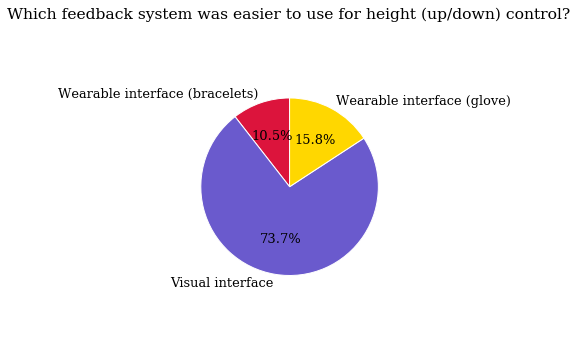

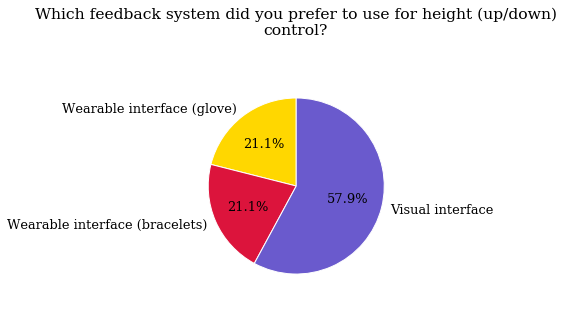

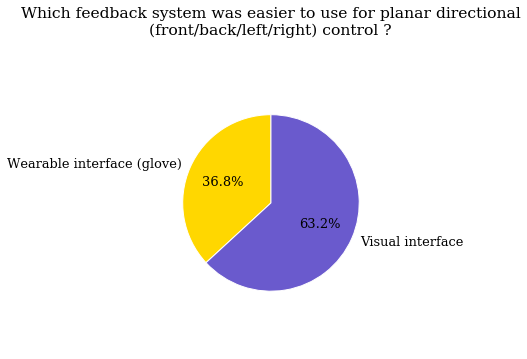

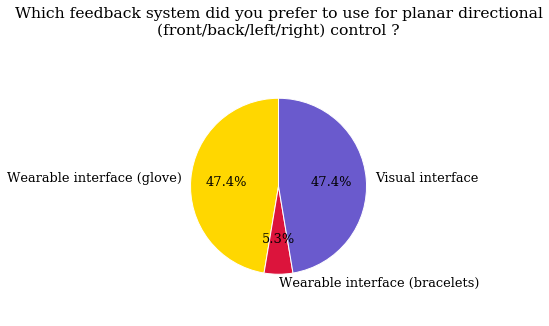

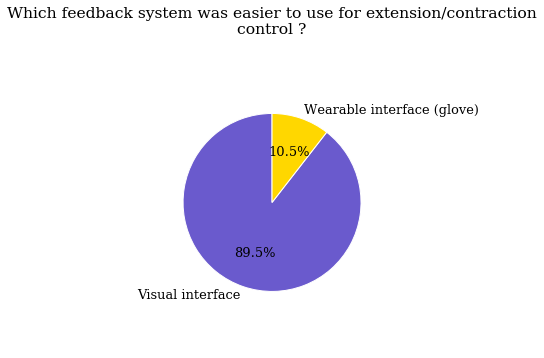

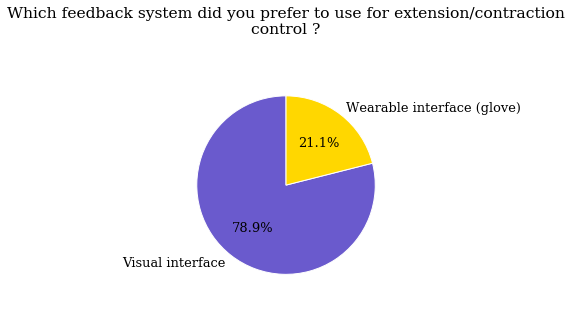

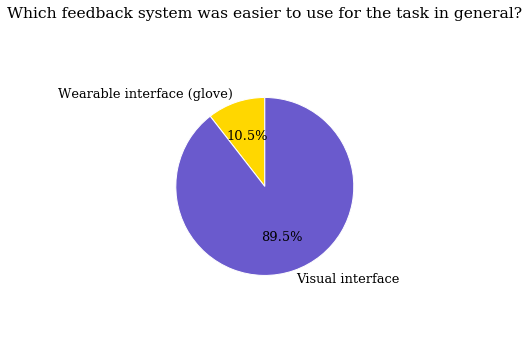

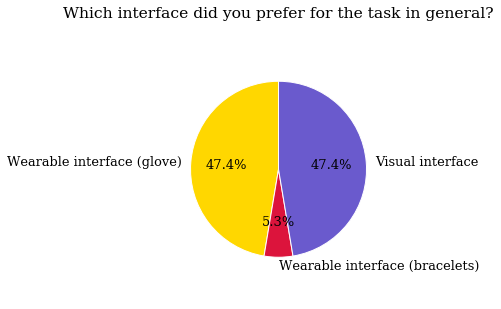

In [19]:
for info_type in information_types:
    plot_pies(info_type)

# Boxplot usefulleness

In this section are plotted "How useful was this device for this information"

In [28]:
def find_column_name_bxplot(type_of_info):
    column_names = {}
    for title in list(general_df.columns):
        if type_of_info in title and "useful" in title:
            if "visual" in title:
                column_names["Visual"] = title
            elif "glove" in title:
                column_names["Glove"] = title
            elif "bracelets" in title:
                column_names["Bracelets"] = title
           
                
    return column_names

In [29]:
find_column_name_bxplot("directional")

{'Bracelets': 'How useful were the bracelets for horizontal directional (front/back/left/right) control ?',
 'Glove': 'How useful was the glove for horizontal directional (front/back/left/right) control ?',
 'Visual': 'How useful was the visual feedback for horizontal directional (front/back/left/right) control ?'}

In [30]:
column_names = find_column_name_bxplot("directional")
[column_names[feedback_types[0]], column_names[feedback_types[1]], column_names[feedback_types[2]]]

['How useful was the visual feedback for horizontal directional (front/back/left/right) control ?',
 'How useful was the glove for horizontal directional (front/back/left/right) control ?',
 'How useful were the bracelets for horizontal directional (front/back/left/right) control ?']

In [31]:
def boxplot_useful(information_type):
    # Define styling for each boxplot component
    medianprops = {'color': 'magenta', 'linewidth': 2}
    boxprops = {'color': 'black', 'linestyle': '-', 'linewidth':2}
    whiskerprops = {'color': 'black', 'linestyle': '-'}
    capprops = {'color': 'black', 'linestyle': '-'}
    flierprops = {'color': 'black', 'marker': 'x'}
 
    fig = plt.figure()
    ax = plt.axes()

    width = 0.5
    column_names = find_column_name_bxplot(information_type)
    bp = plt.boxplot([10*general_df[column_names[feedback_types[0]]], 10*general_df[column_names[feedback_types[1]]], 10*general_df[column_names[feedback_types[2]]]],
                     widths = width, labels = feedback_types,medianprops=medianprops,
                       boxprops=boxprops,
                       whiskerprops=whiskerprops,
                     patch_artist=True,  # fill with color
                       capprops=capprops,
                       flierprops=flierprops )

    colors = ['pink', 'lightblue', 'lightgreen']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        
    title = plt.title('\n'.join(wrap(column_names[feedback_types[0]].replace("visual ", ""), 40)))
    title.set_y(1.05)
    ax.set_xlabel('Feedback type')
    ax.set_ylabel('Response')
    ax.set_ylim(-10,110)

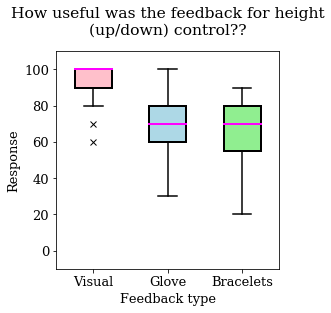

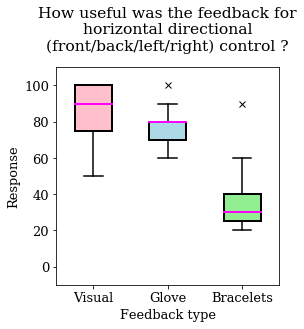

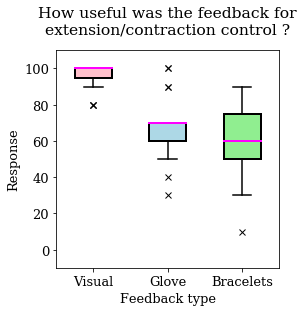

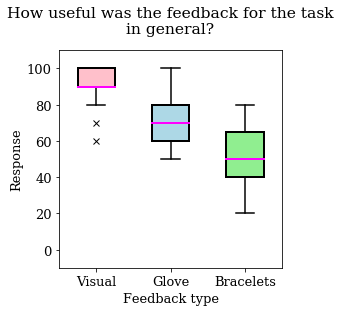

In [32]:
for info_type in information_types:
    boxplot_useful(info_type)

In [34]:
def check_normality_useful():
    nb_of_transfo = 3
    for info_type in information_types:
        column_names = find_column_name_bxplot(info_type)
        column = 0
        fig, ax = plt.subplots(nrows=2, ncols=nb_of_transfo*3, figsize=(nb_of_transfo*4*3,10))
        for feedback_type in feedback_types:    
            question = column_names[feedback_type]

            distr = 10* general_df[question]
            for i in range(0,nb_of_transfo):
                if i==0:
                    transfo = ""
                    distribution = distr
                elif i == 1: 
                    transfo = " log"
                    distribution = np.log(np.array(distr))
                elif i ==2:
                    transfo = " sqrt"
                    distribution =  np.sqrt(distr)

                #         Histogram
                stat, p = shapiro(distribution)
    #             print('Statistics=%.3f, p=%.3f' % (stat, p))
                # interpret
                alpha = 0.05
                if p > alpha: 
                    result_color = 'lightgreen'
                    result_text = 'Sample = Gaussian'
                else: 
                    result_color = 'lightsalmon'
                    result_text = "Sample != Gaussian"

                ax[0][column].plot([],[], color = result_color, label = result_text)
                ax[0][column].legend()


                ax[0][column].hist(distribution,color = result_color)
                ax[0][column].set_ylabel("Nb of subjects")
                ax[0][column].set_xlabel("Time [s]")
        #         qqplot
                qqplot(np.asarray(distribution), line='s', ax = ax[1][column], color = result_color)
                ax[0][column].set_title(transfo)
                column += 1
                plt.tight_layout()    
            plt.suptitle("How useful where the feedbacks for the different tasks",y = 1.02, ha = 'left')


In [ ]:
check_normality_useful()

Has the visual feedback result in non-normal distribution for all the questions and the transformations, the Friedman test will be used for all the questions

In [40]:
def hypothesis_test_useful(fb_type1, fb_type2, info_type):
    column_names = find_column_name_bxplot(info_type)
    question = column_names[fb_type1]
    distr1 = general_df[question]
    question = column_names[fb_type2]
    distr2 = general_df[question]

    _, pvalue = scipy.stats.kruskal(distr1, distr2) 
    if pvalue < 0.001:
        print(" *** ")
    elif pvalue < 0.01:
        print(" ** ")
    elif pvalue < 0.05:
        print(" * ")
    if pvalue < 0.05:
        print("H0 hypothesis (feedback has no effect) is rejected")  
        if np.mean(np.asarray(distr1)) > np.mean(np.asarray(distr2)):
            print(question + " " + fb_type1 +" feedback gives better results than " + fb_type2 + " feedback " )
        else:
            print(question + " " + fb_type2 +" feedback gives better results than " + fb_type1 + " feedback " )
    else:
        print(question + " " +  "H0 hypothesis (feedback has no effect) is accepted"+ " with "+fb_type1 +" and "+fb_type2 )
    print("")

def test_all_hypo_for_questions_useful():
    for info_type in information_types:
        hypothesis_test_useful("Visual", "Glove", info_type)
        hypothesis_test_useful("Visual", "Bracelets", info_type)
        hypothesis_test_useful("Bracelets", "Glove", info_type)
    
        

In [41]:
test_all_hypo_for_questions_useful()

 *** 
H0 hypothesis (feedback has no effect) is rejected
How useful was the glove for height (up/down) control?? Visual feedback gives better results than Glove feedback 

 *** 
H0 hypothesis (feedback has no effect) is rejected
How useful were the bracelets for height (up/down) control?? Visual feedback gives better results than Bracelets feedback 

How useful was the glove for height (up/down) control?? H0 hypothesis (feedback has no effect) is accepted with Bracelets and Glove

 * 
H0 hypothesis (feedback has no effect) is rejected
How useful was the glove for horizontal directional (front/back/left/right) control ? Visual feedback gives better results than Glove feedback 

 *** 
H0 hypothesis (feedback has no effect) is rejected
How useful were the bracelets for horizontal directional (front/back/left/right) control ? Visual feedback gives better results than Bracelets feedback 

 *** 
H0 hypothesis (feedback has no effect) is rejected
How useful was the glove for horizontal direct